<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Поиск-пропусков-и-дубликатов" data-toc-modified-id="Поиск-пропусков-и-дубликатов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Поиск пропусков и дубликатов</a></span></li><li><span><a href="#Приведение-данных-к-необходимому-формату" data-toc-modified-id="Приведение-данных-к-необходимому-формату-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Приведение данных к необходимому формату</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Определение-максимальных-и-минимальных-значений-за-период" data-toc-modified-id="Определение-максимальных-и-минимальных-значений-за-период-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение максимальных и минимальных значений за период</a></span></li><li><span><a href="#Определение-трендов-и-сезонностей" data-toc-modified-id="Определение-трендов-и-сезонностей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Определение трендов и сезонностей</a></span><ul class="toc-item"><li><span><a href="#Период-5-месяцев" data-toc-modified-id="Период-5-месяцев-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Период 5 месяцев</a></span></li><li><span><a href="#Период-1-месяц" data-toc-modified-id="Период-1-месяц-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Период 1 месяц</a></span></li><li><span><a href="#Период-1-неделя" data-toc-modified-id="Период-1-неделя-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Период 1 неделя</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Применение-модели-случайного-леса" data-toc-modified-id="Применение-модели-случайного-леса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Применение модели случайного леса</a></span></li><li><span><a href="#Применение-модели-линейной-регрессии" data-toc-modified-id="Применение-модели-линейной-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Применение модели линейной регрессии</a></span></li><li><span><a href="#Построение-модели-Ridge" data-toc-modified-id="Построение-модели-Ridge-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Построение модели Ridge</a></span></li><li><span><a href="#Построение-модели-Lasso" data-toc-modified-id="Построение-модели-Lasso-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Построение модели Lasso</a></span></li><li><span><a href="#Построение-модели-ElasticNet" data-toc-modified-id="Построение-модели-ElasticNet-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Построение модели ElasticNet</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

## Подготовка

Импорт необходимых библиотек:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    TimeSeriesSplit
)
from sklearn.metrics import (mean_squared_error, make_scorer)
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
)
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

### Загрузка данных

In [6]:
df_orig = pd.read_csv(r"C:\Users\danii\projects\project_prediction_orders_taxi\taxi.csv")


In [7]:
df = df_orig.copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


### Поиск пропусков и дубликатов

In [8]:
df['datetime'].duplicated().sum()

0

In [9]:
df.isna().sum()

datetime      0
num_orders    0
dtype: int64

Пропуски и дубликаты отсутствуют.

### Приведение данных к необходимому формату

In [10]:
df['datetime'] = df['datetime'].astype('datetime64')
df.index = df['datetime']
df = df.drop('datetime', axis = 1)
print('Хронологический порядок - ', df.index.is_monotonic_increasing)
df.info()
df.head()

Хронологический порядок -  True
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [11]:
df_res = df.resample('1H').sum()
df_res.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


## Анализ

### Определение максимальных и минимальных значений за период

Максимальное и минимальное количество поездок за период:

In [12]:
period_list = ['1H', '1D', '1W', '1M']
tabl = pd.DataFrame(columns = ['Макс. значение', 'Мин. значение', 'Дата'], index = period_list)
period_list_2 = ['1 час', '1 день', '1 неделя', '1 месяц']
for i in period_list:
    tabl.loc[i, 'Макс. значение'] = df['num_orders'].resample(i).sum().max()
    tabl.loc[i, 'Мин. значение'] = df['num_orders'].resample(i).sum().min()
tabl

,Макс. значение,Мин. значение,Дата
1H,462,0,NaN
1D,4090,1076,NaN
1W,23297,5301,NaN
1M,94973,42768,NaN


### Определение трендов и сезонностей

Общий график:

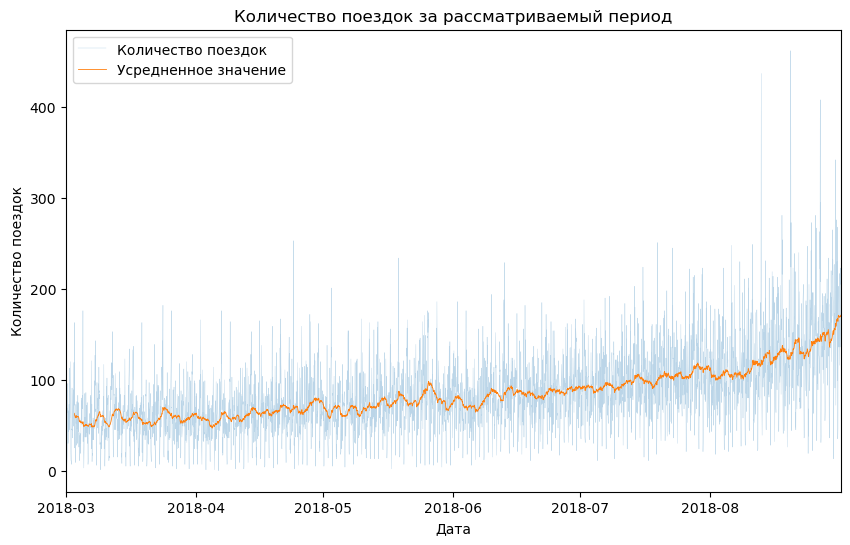

In [13]:
decomposed = seasonal_decompose(df_res)

plt.figure(figsize = (10, 6))
plt.plot(df_res, alpha = 0.3, lw = 0.3)
plt.plot(df_res.rolling(50).mean(), lw = 0.6)
plt.xlim([df.index.min(), df.index.max()])
plt.xlabel('Дата')
plt.ylabel('Количество поездок')
plt.title('Количество поездок за рассматриваемый период')
plt.legend(['Количество поездок', 'Усредненное значение']);

#### Период 5 месяцев

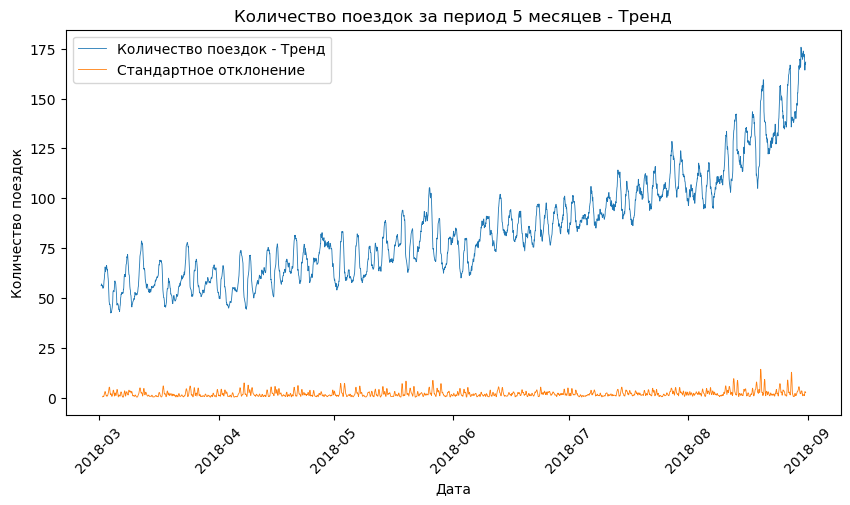

In [14]:
decomposed = seasonal_decompose(df_res)
plt.figure(figsize=(10, 5))
plt.plot(decomposed.trend, lw = 0.6)
plt.plot(decomposed.trend.rolling(10).std(), lw = 0.6)
plt.xticks(rotation = 45)
plt.legend(['Количество поездок - Тренд', 'Стандартное отклонение']);
plt.xlabel('Дата')
plt.ylabel('Количество поездок')
plt.title('Количество поездок за период 5 месяцев - Тренд')
plt.show()

Тренды за период 5 месяцев:

- Среднее количество поездок за час незначительно увеличивается с течением времени;
- Стандартное отклонение количества поездок не изменяется.

Временной ряд нельзя назвать стационарным, так как у него меняется среднее значение.

#### Период 1 месяц

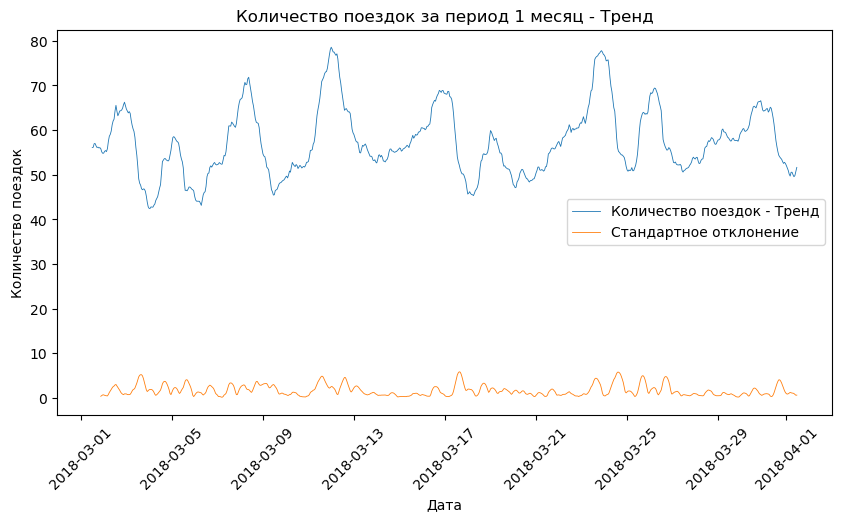

In [15]:
decomposed = seasonal_decompose(df_res['2018-03-01':'2018-04-01'])
plt.figure(figsize=(10, 5))
plt.plot(decomposed.trend, lw = 0.6)
plt.plot(decomposed.trend.rolling(10).std(), lw = 0.6)
plt.xticks(rotation = 45)
plt.legend(['Количество поездок - Тренд', 'Стандартное отклонение']);
plt.xlabel('Дата')
plt.ylabel('Количество поездок')
plt.title('Количество поездок за период 1 месяц - Тренд')
plt.show()

Тренды за период 1 месяц:

- Среднее количество поездок за час не изменяется с течением времени;
- Стандартное отклонение количества поездок не изменяется.

Данный временной ряд можно назвать стационарным.

#### Период 1 неделя

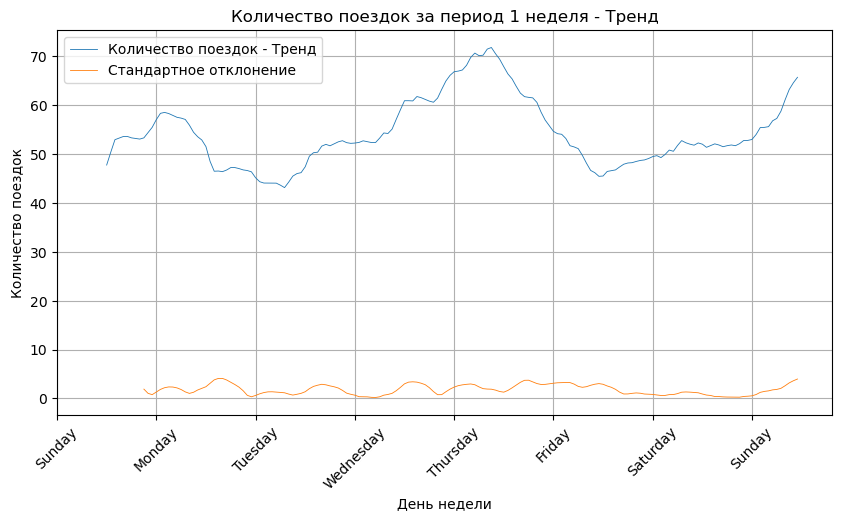

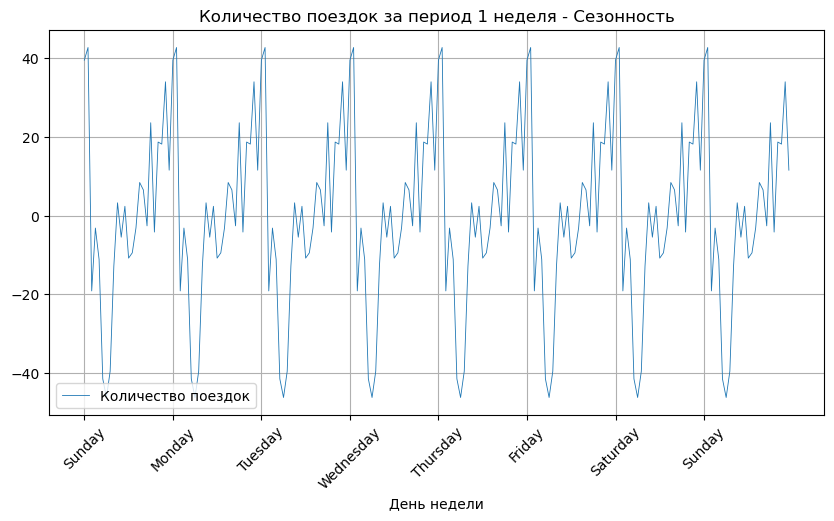

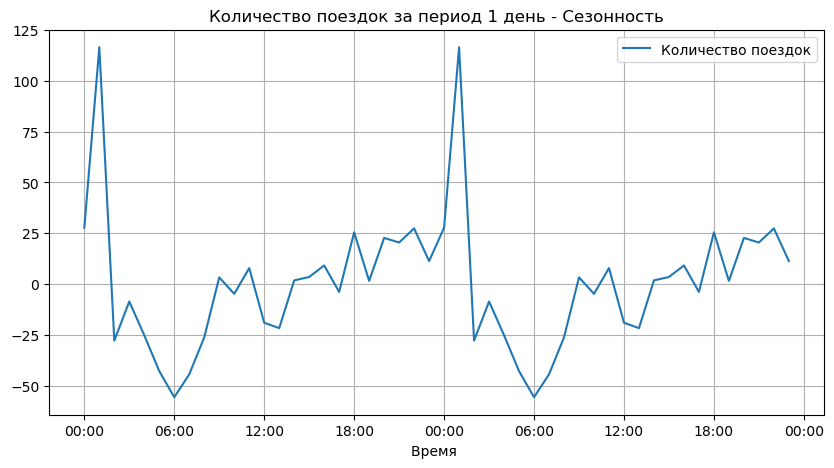

In [16]:
decomposed = seasonal_decompose(df_res['2018-03-04':'2018-03-11'])
plt.figure(figsize=(10, 5))
plt.plot(decomposed.trend, lw = 0.6)
plt.plot(decomposed.trend.rolling(10).std(), lw = 0.6)
date = (['2018-03-04', '2018-03-05', '2018-03-06', '2018-03-07',
        '2018-03-08', '2018-03-09', '2018-03-10', '2018-03-11'])
dow = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(date, dow, rotation = 45)
plt.legend(['Количество поездок - Тренд', 'Стандартное отклонение']);
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.title('Количество поездок за период 1 неделя - Тренд')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(decomposed.seasonal, lw = 0.6)
plt.xticks(date, dow, rotation = 45)
plt.legend(['Количество поездок', 'Стандартное отклонение']);
plt.xlabel('День недели')
plt.title('Количество поездок за период 1 неделя - Сезонность')
plt.grid(True)
plt.show()

decomposed = seasonal_decompose(df_res['2018-03-04':'2018-03-05'])
plt.figure(figsize=(10, 5))
plt.plot(decomposed.seasonal)
date = ['2018-03-04 00:00:00', '2018-03-04 06:00:00', '2018-03-04 12:00:00',
       '2018-03-04 18:00:00', '2018-03-05 00:00:00', '2018-03-05 06:00:00',
       '2018-03-05 12:00:00', '2018-03-05 18:00:00', '2018-03-06 00:00:00']
dow = (['00:00', '06:00', '12:00', '18:00', '00:00', '06:00', '12:00', '18:00', '00:00'])
plt.xticks(date, dow)
plt.legend(['Количество поездок', 'Стандартное отклонение']);
plt.xlabel('Время ')
plt.title('Количество поездок за период 1 день - Сезонность')
plt.grid(True)
plt.show()

Тренды за период 1 неделя:

- Среднее количество поездок за час зависит от дня недели - пик наблюдается в четверг и понедельник;
- Стандартное отклонение количества поездок не изменяется.
- Наблюдается сезонность для периода 1 сутки - колчество поездок растет в течении суток до времени 01:00, затем резко уменьшается до времени 06:00.

Данный временной ряд можно нельзя назвать стационарным, так как среднее значение меняется с течением времени.

## Обучение

Создание дополнительных признаков :

In [17]:
def make_f(df_or, max_lag, rol_size):
    df = df_or.copy()
    df['month'] = df_res.index.month
    df['day'] = df_res.index.day
    df['dayofweek'] = df_res.index.dayofweek
    for i in range (1, max_lag + 1):
        name = 'lag_' + str(i)
        df[name] = df['num_orders'].shift(i)
    df = df.dropna()
    df['rolling_mean'] = df['num_orders'].shift().rolling(rol_size).mean()
    df = df.dropna()
    return df
df_res_work = make_f(df_res, 24, 100)

In [18]:
df_res_work.head()

,num_orders,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-06 04:00:00,30,3,6,1,49.0,36.0,75.0,42.0,47.0,72.0,...,85.0,62.0,50.0,59.0,31.0,14.0,3.0,16.0,34.0,53.98
2018-03-06 05:00:00,36,3,6,1,30.0,49.0,36.0,75.0,42.0,47.0,...,37.0,85.0,62.0,50.0,59.0,31.0,14.0,3.0,16.0,53.38
2018-03-06 06:00:00,7,3,6,1,36.0,30.0,49.0,36.0,75.0,42.0,...,58.0,37.0,85.0,62.0,50.0,59.0,31.0,14.0,3.0,52.54
2018-03-06 07:00:00,10,3,6,1,7.0,36.0,30.0,49.0,36.0,75.0,...,45.0,58.0,37.0,85.0,62.0,50.0,59.0,31.0,14.0,51.86
2018-03-06 08:00:00,25,3,6,1,10.0,7.0,36.0,30.0,49.0,36.0,...,59.0,45.0,58.0,37.0,85.0,62.0,50.0,59.0,31.0,51.32


In [19]:
X = df_res_work.drop('num_orders', axis = 1)
y = df_res_work['num_orders']
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.1, shuffle = False, random_state = 123)

Для проверки моделей на адекватность, узнаем метрику RMSE у модели, дающей предсказания по предыдущему значению временного ряда: 

In [20]:
pred = y_test.shift(fill_value = y_train.iloc[-1])
print(f'Значение метрики RMSE: {mean_squared_error(pred, y_test, squared = False)}')


Значение метрики RMSE: 59.12776863078645


Скорер для оценки моделей:

In [21]:
def rmse(target, pred):
    error = np.sqrt(np.mean((target - pred) ** 2))
    return error

rmse_scorer = make_scorer(rmse, greater_is_better = False)

### Применение модели случайного леса

Подбор гиперпараметров и определение метрики RMSE:

In [22]:
print(datetime.now())
start = datetime.now()
param = {
    'n_estimators': range(30, 100, 10),
    'max_depth': range(5, 16, 2)
}

model = RandomForestRegressor()
grid = GridSearchCV(model, param, cv = TimeSeriesSplit(n_splits = 5), scoring = rmse_scorer)
grid.fit(X_train, y_train)

print('Лучшие гиперпараметры:', grid.best_params_)
print('Метрика RSME:', -grid.cv_results_['mean_test_score'].mean())
print(f'--- {datetime.now() - start} ---')

2023-09-15 19:01:12.356799


Лучшие гиперпараметры: {'max_depth': 13, 'n_estimators': 80}
Метрика RSME: 26.451931933450958
--- 0:10:16.554646 ---


### Применение модели линейной регрессии

In [23]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv = TimeSeriesSplit(n_splits = 5), scoring = rmse_scorer)
print('Метрика RSME:', -scores.mean())

Метрика RSME: 27.106952037711324


### Построение модели Ridge

In [24]:
model = Ridge()
scores = cross_val_score(model, X_train, y_train, cv = TimeSeriesSplit(n_splits = 5), scoring = rmse_scorer)
print('Метрика RSME:', -scores.mean())

Метрика RSME: 27.110361028680085


### Построение модели Lasso

In [25]:
model = Lasso()
scores = cross_val_score(model, X_train, y_train, cv = TimeSeriesSplit(n_splits = 5), scoring = rmse_scorer)
print('Метрика RSME:', -scores.mean())

Метрика RSME: 27.254616091837555


### Построение модели ElasticNet

In [26]:
model = ElasticNet()
scores = cross_val_score(model, X_train, y_train, cv = TimeSeriesSplit(n_splits = 5), scoring = rmse_scorer)
print('Метрика RSME:', -scores.mean())

Метрика RSME: 27.24348793221053


Лучший показатель метрики RMSE (26.42) на обучающей выборке с применением кросс-валидации был получен на модели Случайный лес, стоит отметить что идентичный результат был получен на всех обучаемых моделях. 

## Тестирование

In [27]:
model = RandomForestRegressor(max_depth = 13, n_estimators = 90)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_1 = model.predict(X_train)
print(f'Значение метрики RMSE для обучающих данных: {mean_squared_error(pred_1, y_train, squared = False)}')
print(f'Значение метрики RMSE для тестовых данных: {mean_squared_error(pred, y_test, squared = False)}')

Значение метрики RMSE для обучающих данных: 11.144552975924546
Значение метрики RMSE для тестовых данных: 43.72581995987129


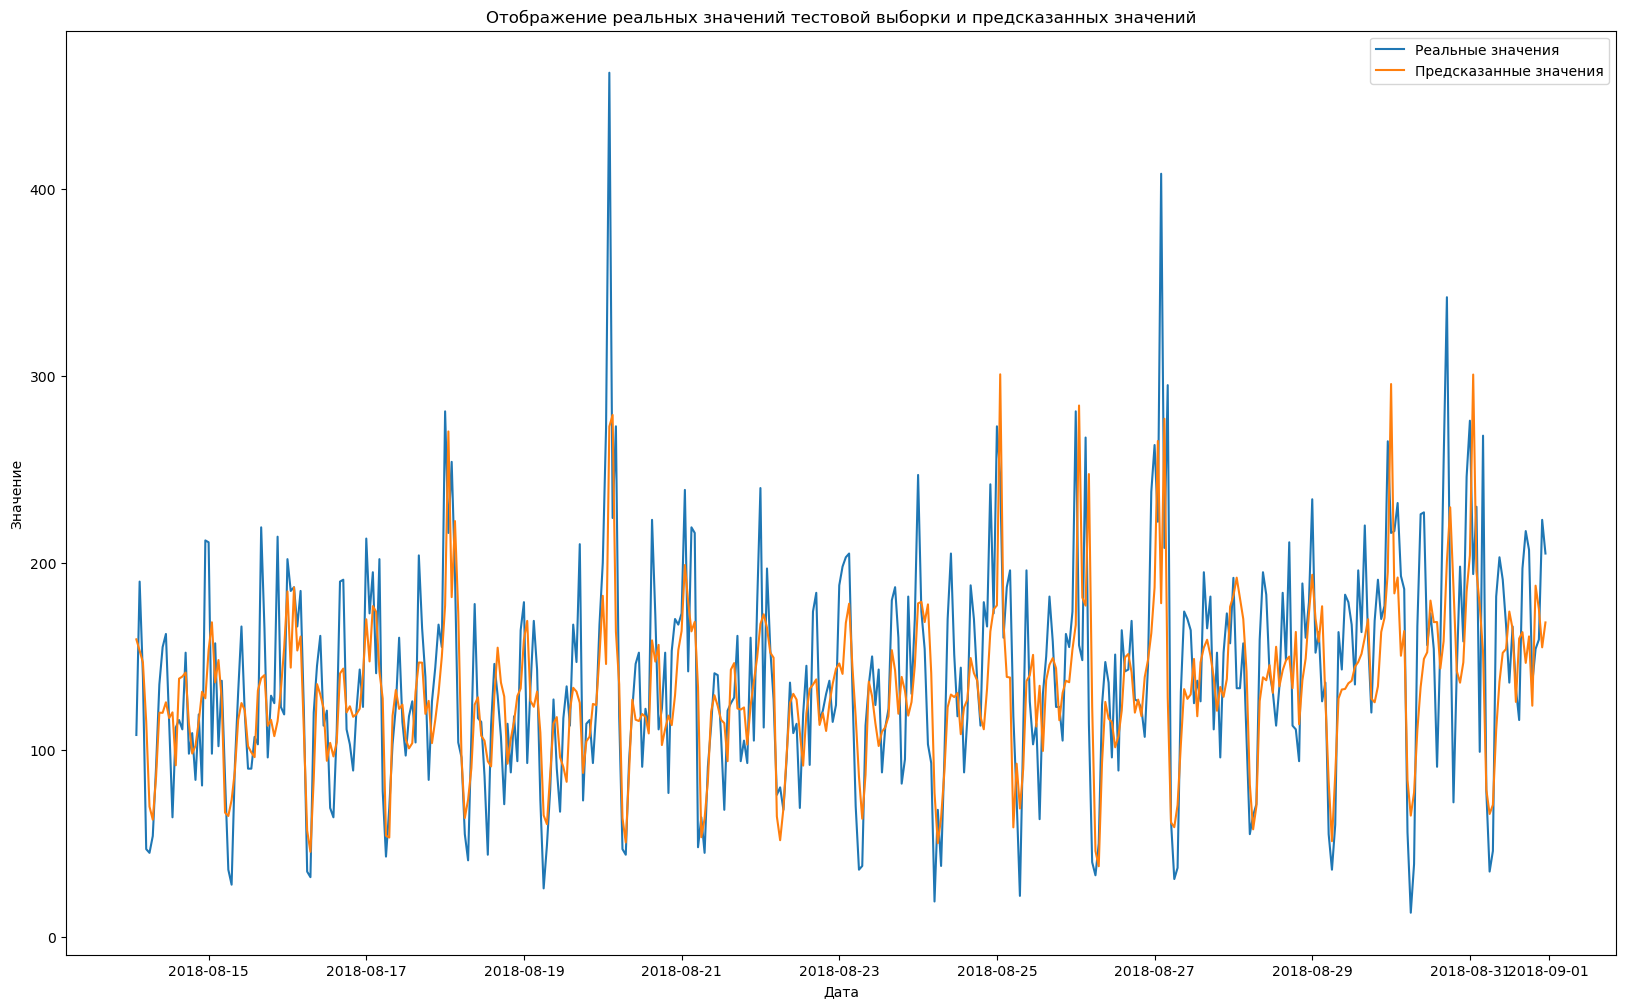

In [28]:
tabl_1 = pd.DataFrame({
    'Реальные значения' : y_test,
    'Предсказанные значения' : pred
})
plt.figure(figsize = (20, 12))
plt.plot(tabl_1)
plt.legend(['Реальные значения', 'Предсказанные значения'])
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Отображение реальных значений тестовой выборки и предсказанных значений');

## Вывод 

В результате подготовки исходные данные были загружены в датафрейм, данные были приведены к необходимому формату, было выполнено ресемплирование данных.

В результате анализа данных были сделаны следующие выводы:
- Определено максимальное и минимальное количество поездок за периоды: 1 месяц, 1 неделя, 1 день, 1 час;
- Определены тренды изменения количества поездок и исследована стационарность временного ряда за периоды: весь период, 1 месяц, 1 неделя, 1 день;
- Была установлена сезонность для периода 1 сутки.

В результате обучения модели были выполнены следующие действия:
- Были созданы признаки: календарные (месяц, день недели, день), отстающие значения (24 шт), скользящее среднее;
- Были обучены модели Случайный лес, модель линейной регрессии, Ridge, Lasso, ElasticNet;
- Для данных моделей на обучающей выборке с помощью кросс-валидации опрерделена метрика RMSE, по данной метрике была выбрана лучшая модель - Случайный лес;
- Было произведено тестирование модели Случайный лес на тестовых данных - Значение метрики RMSE составило 44.0.